## Problem Setup

In [1]:
# import libaries
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [2]:
# Specify the path to your CSV file
csv_file = 'hw3data.csv'

# Use numpy.genfromtxt to read the CSV file
data = np.genfromtxt(csv_file, delimiter=',', skip_header=1)

# first data column is year and second is kBPY

In [3]:
# set year and data arrays
year = data[:,0]
kbpy = data[:,1]
year = year[::-1]
kbpy = kbpy[::-1]

# create G matrix
G = np.ones((len(year),3))
G[:,1] = year
G[:,2] = year ** 2

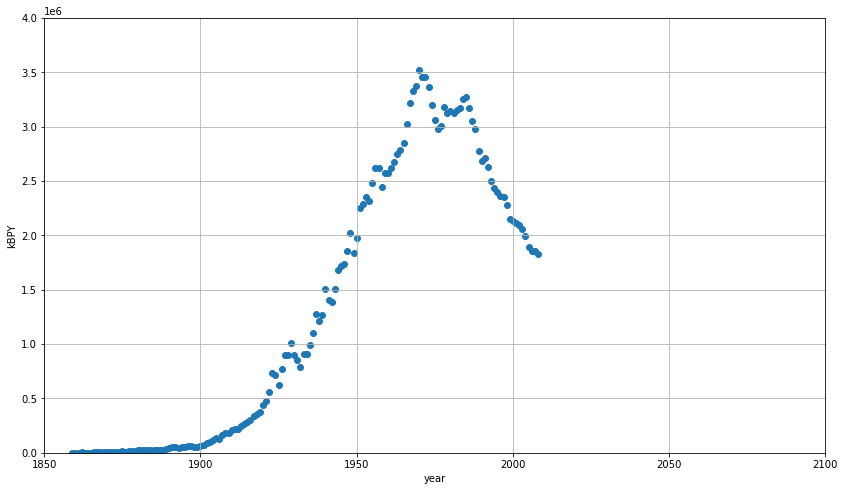

In [4]:
# check that data is plotting correctly
plt.figure(figsize=(14,8))
plt.scatter(year,kbpy)
plt.grid()
plt.xlabel('year')
plt.ylabel('kBPY')
plt.xlim([1850,2100])
plt.ylim([0,4*10**6])
plt.show()

## Solve Inverse Problem

**Original Equation:**
$$
f(x) = ae^{-b(x-c)^2}
$$


**Linearized Equation:**
$$
\ln(f(x)) = \ln(a) - b(x-c)^2
$$

$$
=\left[ \ln(a) - bc^2 \right] + \left[ 2bc \right]x - \left[ b \right]x^2
$$

$$
=i + jx + kx^2
$$

**We are assuming that a gaussian is the best function to model this data.**

In [5]:
# solve for model parameters using least squares solution for values i,j,k
A = G.T@G
B = G.T@np.log(kbpy)

uwtd = linalg.solve(A,B)

print('i,j,k:')
uwtd

i,j,k:


C:\Users\ejdea\AppData\Local\Temp/ipykernel_17928/772165768.py:5: LinAlgWarning: Ill-conditioned matrix (rcond=1.43392e-20): result may not be accurate.
  uwtd = linalg.solve(A,B)


array([-2.31303136e+03,  2.35598756e+00, -5.96082200e-04])

## Solve Forward Problem

**We are assuming that all oil undergoes the specified conversion to CO2 and that oil production continues to decline past 2008 (even after fracking).**

In [6]:
# specify year array
xs = np.arange(1850,2101,1)

# specify forward operator
G2 = np.ones((len(xs),3))
G2[:,1] = xs
G2[:,2] = xs ** 2

# solve forward problem
ks = np.exp(G2@uwtd)

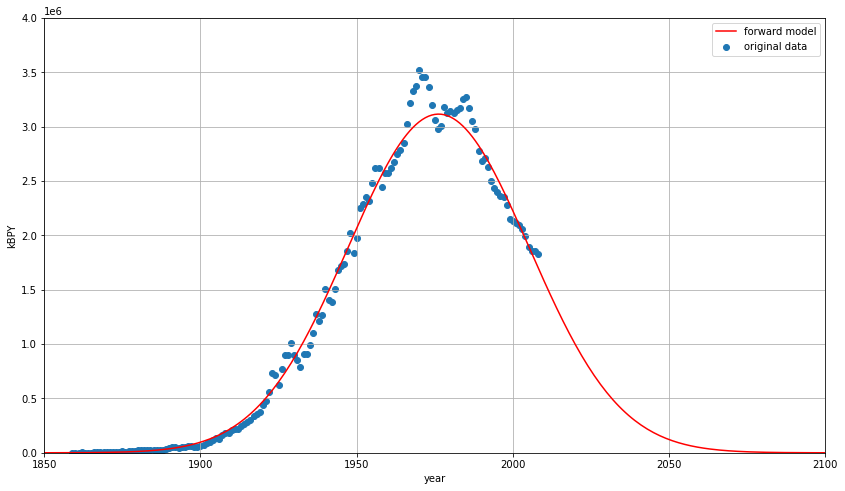

In [7]:
# plot original data and forward model
plt.figure(figsize=(14,8))
plt.scatter(year,kbpy, label='original data')
plt.plot(xs,ks, c='red', label='forward model')
plt.grid()
plt.xlabel('year')
plt.ylabel('kBPY')
plt.xlim([1850,2100])
plt.ylim([0,4*10**6])
plt.legend()
plt.show()

## Solve for total CO2 Production

In [8]:
totoil = np.cumsum(ks*1000)[-1]
factor = 3.15
co2 = totoil/factor

print('Oil produced from 1850-2100 is:', totoil, 'barrels' )
print('CO2 produced from 1850-2100 is:', co2, 'tons')

Oil produced from 1850-2100 is: 226161665227.26077 barrels
CO2 produced from 1850-2100 is: 71797354040.40025 tons
